# Data Gathering WerateDog Twitter

In [381]:
import json
import pandas as pd
twitter_archive_enhanced = pd.read_csv("/Users/krish/Desktop/Nanodegree/Project 3/twitter-archive-enhanced.csv")

### Image data

In [382]:
import requests
URL ="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(URL)

In [383]:
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [384]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

### Api data

In [385]:
import tweepy
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [386]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [387]:
# Print Failed tweet ids
tweet_status_list = []
for tweet_id in twitter_archive_enhanced['tweet_id']:
    try:
        tweet_status = api.get_status(tweet_id, tweet_mode = 'extended')
        tweet_status_list.append(tweet_status)
    except:
            print("Failed: {}".format(tweet_id))

Failed: 888202515573088257
Failed: 873697596434513921
Failed: 869988702071779329
Failed: 866816280283807744
Failed: 861769973181624320
Failed: 845459076796616705
Failed: 842892208864923648
Failed: 837012587749474308
Failed: 827228250799742977
Failed: 802247111496568832
Failed: 775096608509886464


Rate limit reached. Sleeping for: 627
Rate limit reached. Sleeping for: 638


In [388]:

with open('tweet_json.txt', 'a') as f:
        for tweet_id in twitter_archive_enhanced['tweet_id']:
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                json.dump(tweet._json, f)
                f.write('\n')
            except:
                continue

Rate limit reached. Sleeping for: 639
Rate limit reached. Sleeping for: 651
Rate limit reached. Sleeping for: 644


In [389]:
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

### Converting to dataframe

In [390]:
tweet_api = pd.DataFrame()

In [391]:
tweet_api['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_api['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_api['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

## Assess data

In [392]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [393]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [394]:
twitter_archive_enhanced.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
726,782598640137187329,NaN,NaN,2016-10-02 15:10:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Timmy. He's quite large. According to a trusted source it's actually a dog wearing a dog suit. 11/10 https://t.co/BIUchFwHqn,NaN,NaN,NaN,https://twitter.com/dog_rates/status/782598640137187329/photo/1,11,10,Timmy,None,None,None,None
1327,705975130514706432,NaN,NaN,2016-03-05 04:36:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Adele. Her tongue flies out of her mouth at random. It's a debilitating illness. 10/10 stay strong pupper https://t.co/cfn81n3FLO,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/705975130514706432/photo/1,https://twitter.com/dog_rates/status/705975130514706432/photo/1",10,10,Adele,None,None,pupper,None
1960,673363615379013632,NaN,NaN,2015-12-06 04:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This little pupper can't wait for Christmas. He's pretending to be a present. S'cute. 11/10 twenty more days 🎁🎄🐶 https://t.co/m8r9rbcgX4,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673363615379013632/photo/1,11,10,None,None,None,pupper,None
2076,670838202509447168,NaN,NaN,2015-11-29 05:34:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Pink dogs here. Unreasonably long necks. Left guy has only 1 leg. Quite nimble. Don't bark tho 4/10s would still pet https://t.co/QY5uvMmmQk,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670838202509447168/photo/1,4,10,None,None,None,None,None
1205,715928423106027520,NaN,NaN,2016-04-01 15:46:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bubbles. He's a Yorkshire Piccolope. 11/10 would snug aggressively https://t.co/3BhMojONxq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715928423106027520/photo/1,11,10,Bubbles,None,None,None,None
442,819588359383371776,NaN,NaN,2017-01-12 16:54:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jazzy. She just found out that sandwich wasn't for her. Shocked and puppalled. 13/10 deep breaths Jazzy https://t.co/52cItP0vIO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819588359383371776/photo/1,13,10,Jazzy,None,None,None,None
1409,699060279947165696,NaN,NaN,2016-02-15 02:38:53 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Yukon. He pukes rainbows. 12/10 magical af https://t.co/n6wND1v7il,NaN,NaN,NaN,https://vine.co/v/inlmMHxtqDD,12,10,Yukon,None,None,None,None
1318,706538006853918722,NaN,NaN,2016-03-06 17:52:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Oliver (pronounced ""Ricardo""). He's a ship captain. Controls these treacherous waters. 11/10 would sail with https://t.co/bxjO45rXKd",NaN,NaN,NaN,https://twitter.com/dog_rates/status/706538006853918722/photo/1,11,10,Oliver,None,None,None,None
568,802185808107208704,NaN,NaN,2016-11-25 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @ChinoChinako: They're good products, Brent\n\nMug holds drinks; hoodie is comfy af. 13/10 \n\nPuppy Aika h*cking agrees. @dog_rates https:/…",8.000650e+17,24885566.0,2016-11-19 19:55:41 +0000,"https://twitter.com/ChinoChinako/status/800065028116385792/photo/1,https://twitter.com/ChinoChinako/status/800065028116385792/photo/1,https://twitter.com/ChinoChinako/status/800065028116385792/photo/1",13,10,None,None,None,None,None
964,750506206503038976,NaN,NaN,2016-07-06 01:46:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iP

In [395]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [396]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [397]:
twitter_archive_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [398]:
twitter_archive_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [399]:
twitter_archive_enhanced.text


0       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                         
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV    
2       This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                     
3       This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                               
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f    
5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tu

In [400]:
twitter_archive_enhanced.expanded_urls

0       https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                                                                                                                                                
1       https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                                                                                                                                                
2       https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                                                                                                                                                
3       https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                                                                                         

##### expanded_urls have more than one urls in single row

In [401]:
# Want to see name column
pd.set_option('display.max_colwidth', -1)
twitter_archive_enhanced[['text', 'name']]

,text,name
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None
6,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,Jax
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,None
8,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,Zoey
9,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,Cassie


In [402]:
twitter_archive_enhanced.name.sort_values()

1035    Abby        
1021    Abby        
938     Ace         
1933    Acro        
1327    Adele       
1934    Aiden       
77      Aja         
480     Akumi       
820     Al          
875     Albert      
1954    Albert      
144     Albus       
412     Albus       
1115    Aldrick     
2046    Alejandro   
374     Alexander   
1189    Alexanderson
486     Alf         
2238    Alfie       
661     Alfie       
367     Alfie       
1616    Alfie       
858     Alfie       
51      Alfy        
201     Alice       
1701    Alice       
1495    Amber       
1334    Ambrose     
2078    Amy         
2195    Amélie      
         ...        
852     my          
988     not         
335     not         
1747    officially  
1206    old         
993     one         
1936    one         
924     one         
369     one         
2326    quite       
169     quite       
118     quite       
193     quite       
2030    space       
22      such        
2345    the         
2346    the  

In [403]:
twitter_archive_enhanced.name.value_counts()

None        745
a           55 
Charlie     12 
Cooper      11 
Lucy        11 
Oliver      11 
Penny       10 
Lola        10 
Tucker      10 
Bo          9  
Winston     9  
the         8  
Sadie       8  
Daisy       7  
Bailey      7  
Buddy       7  
Toby        7  
an          7  
Koda        6  
Stanley     6  
Leo         6  
Jack        6  
Oscar       6  
Dave        6  
Jax         6  
Rusty       6  
Milo        6  
Scout       6  
Bella       6  
Louis       5  
           ..  
Ashleigh    1  
Superpup    1  
Clybe       1  
Kendall     1  
Venti       1  
Ralphé      1  
Fwed        1  
Craig       1  
Wiggles     1  
Remy        1  
Bubba       1  
Emma        1  
Geno        1  
Lenox       1  
Jangle      1  
space       1  
Snickers    1  
this        1  
Bodie       1  
Ralphus     1  
Ralpher     1  
Clifford    1  
Kayla       1  
life        1  
Lizzie      1  
Livvie      1  
Mary        1  
Roscoe      1  
Vinscent    1  
Moofasa     1  
Name: name, Length: 957,

In [404]:
'''
I found the unusual names apper on name column all starts with lowercase. 
Because it was picked from the text column, which are not real name. I want to see the detail.
'''
list1 = []

name = twitter_archive_enhanced['name']

for word in name:
    if word[0].islower():
        list1.append(word)

In [405]:
list1

['such',
 'a',
 'quite',
 'quite',
 'quite',
 'not',
 'one',
 'incredibly',
 'a',
 'mad',
 'an',
 'very',
 'a',
 'very',
 'just',
 'my',
 'one',
 'not',
 'his',
 'one',
 'a',
 'a',
 'a',
 'an',
 'very',
 'actually',
 'a',
 'just',
 'getting',
 'mad',
 'very',
 'this',
 'unacceptable',
 'all',
 'a',
 'old',
 'a',
 'infuriating',
 'a',
 'a',
 'a',
 'an',
 'a',
 'a',
 'very',
 'getting',
 'just',
 'a',
 'the',
 'the',
 'actually',
 'by',
 'a',
 'officially',
 'a',
 'the',
 'the',
 'a',
 'a',
 'a',
 'a',
 'life',
 'a',
 'one',
 'a',
 'a',
 'a',
 'light',
 'just',
 'space',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'an',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'quite',
 'a',
 'an',
 'a',
 'an',
 'the',
 'the',
 'a',
 'a',
 'an',
 'a',
 'a',
 'a',
 'a']

In [406]:
# function to get unique values
def unique(list1):
 
    # intilize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print (x)

In [407]:
unique(list1)

such
a
quite
not
one
incredibly
mad
an
very
just
my
his
actually
getting
this
unacceptable
all
old
infuriating
the
by
officially
life
light
space


In [408]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [409]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [410]:
image_predictions.img_num.value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

In [411]:
image_predictions.p1_dog.unique()

array([ True, False], dtype=bool)

In [412]:
image_predictions.p2_dog.unique()

array([ True, False], dtype=bool)

In [413]:
image_predictions.p3_dog.unique()

array([ True, False], dtype=bool)

In [414]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [415]:
tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2345 non-null int64
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [416]:
tweet_api.sample(10)

,tweet_id,retweet_count,favorite_count
1903,674330906434379776,78,586
386,825535076884762624,19300,56439
906,756939218950160384,2238,7227
732,780476555013349377,133,0
2068,670826280409919488,4345,5818
1220,713177543487135744,3117,7714
2104,670428280563085312,676,1451
2075,670803562457407488,93,351
1380,700143752053182464,3047,8116
398,823699002998870016,2711,13647


In [417]:
tweet_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8650,38984
1,892177421306343426,6354,33386
2,891815181378084864,4216,25157
3,891689557279858688,8763,42340
4,891327558926688256,9530,40494


In [418]:
tweet_api.tail()

,tweet_id,retweet_count,favorite_count
2340,666049248165822465,40,109
2341,666044226329800704,141,302
2342,666033412701032449,45,125
2343,666029285002620928,47,131
2344,666020888022790149,521,2554


In [419]:
tweet_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.345000e+03,2345.000000,2345.000000
mean,7.422940e+17,3045.535608,8104.170576
std,6.833642e+16,5063.774763,12189.002665
min,6.660209e+17,0.000000,0.000000
25%,6.783802e+17,609.000000,1405.000000
50%,7.189392e+17,1424.000000,3553.000000
75%,7.986979e+17,3552.000000,10023.000000
max,8.924206e+17,77809.000000,144021.000000


## Make copy of original data set

In [420]:
'''
Create copies of original DataFrames. 
Note that: simply assigning a DataFrame to a new
variable name leaves the original DataFrame vulnerable to modifications. So, .copy() is necessary.
'''
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_api_clean = tweet_api.copy()

## Points to be considered


#### Quality Issues
- retweet should not be on twitter_archive_enhanced.
- 'name' on twitter_archive_enhanced has unusual entries such as 'a', 'the', 'an', 'not', 'None', 'such' etc..
- rating_denominator in twitter_archive_enhanced has values greater than 10 & less than 10.
- timestamp and retweeted_status_timestamp are considered as object in twitter_archive_enhanced. Those should be changed to datetime.
- text in twitter_archive_enhanced contains unnecessary entries such as 2.0\n13\10 and https://.....
- More than one expanded_urls are together on twitter_archive_enhanced , which does not open. See the reason why that happened.
- Some rating_numerator in 'text' contains decimal numbers which are infact actual rating. Only the 1st digit after the decimal point is picked on rating_denominator.
- Some jpg_url on image_predictions contains Numbers on them(887343120832229379...), which does not match with corresponding tweet_id.
- Some img_num on image_predictions has number > 1.
- image_predictions only has 2075 rows.
- some ids in image_prediction has img_num more than one.
- tweet_api has only 2346 rows.
- some of favourite_counts, retweet_counts of tweet _api has 0 counts.


#### Tidiness
- Dog columns: doggo, floofer, pupper, puppo on twitter_archive_enhanced should be on single column.
- all data set should be merged together for further analysis.


## Clean data

#### Issue
 - Drop unneeded columns(retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_timestamp) from twitter_archive_enhanced

#### Code

In [421]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['retweeted_status_id', 
'retweeted_status_user_id', 'in_reply_to_user_id', 'in_reply_to_status_id','retweeted_status_timestamp' ], axis=1)

#### Test

In [422]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


#### Issue
 - Change 'timestamp' to datetime in twitter_archive_enhanced

#### Code

In [423]:
twitter_archive_enhanced_clean['timestamp'] = pd.to_datetime(twitter_archive_enhanced_clean['timestamp'])      

#### Test

In [424]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 221.0+ KB


#### Issue
- Change lowercase name to None and change None to NaN in 'name' column of twitter_archive_enhanced

#### Code

In [425]:
import numpy as np

# Change lowercase name to None
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.name.str.islower(),'name'] = 'None' 
# this converts all None to NaN
twitter_archive_enhanced_clean.name = twitter_archive_enhanced_clean.name.replace('None',np.nan)

#### Test

In [426]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1502 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 221.0+ KB


In [427]:
twitter_archive_enhanced_clean.name.sort_values()

1021    Abby        
1035    Abby        
938     Ace         
1933    Acro        
1327    Adele       
1934    Aiden       
77      Aja         
480     Akumi       
820     Al          
875     Albert      
1954    Albert      
412     Albus       
144     Albus       
1115    Aldrick     
2046    Alejandro   
374     Alexander   
1189    Alexanderson
486     Alf         
367     Alfie       
858     Alfie       
2238    Alfie       
1616    Alfie       
661     Alfie       
51      Alfy        
1701    Alice       
201     Alice       
1495    Amber       
1334    Ambrose     
2078    Amy         
2195    Amélie      
         ...        
2326    NaN         
2327    NaN         
2328    NaN         
2329    NaN         
2330    NaN         
2331    NaN         
2332    NaN         
2333    NaN         
2334    NaN         
2335    NaN         
2336    NaN         
2337    NaN         
2338    NaN         
2339    NaN         
2340    NaN         
2341    NaN         
2342    NaN  

#### Issue
- Extract doggo, floofer, pupper, puppo from 'text' to make new column dog_stage and change None to NaN

#### Code

In [428]:
# Make dog_stage retrieving 4 stages from text column in twitter_archive_enhanced_clean
twitter_archive_enhanced_clean['dog_stage'] = twitter_archive_enhanced_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)
# Remove 4 dog stages column from twitter_archive_enhanced_clean
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

#### Test

In [429]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1502 non-null object
dog_stage             399 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 165.7+ KB


In [430]:
twitter_archive_enhanced_clean['dog_stage'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [431]:
twitter_archive_enhanced_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
933,753655901052166144,2016-07-14 18:22:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""The dogtor is in hahahaha no but seriously I'm very qualified and that tumor is definitely malignant"" 10/10 https://t.co/ULqThwWmLg",https://twitter.com/dog_rates/status/753655901052166144/photo/1,10,10,NaN,NaN
593,798925684722855936,2016-11-16 16:28:21,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Shadow. He's a firm believer that they're all good dogs. H*ckin passionate about it too. 11/10 I stand with Shadow https://t.co/8yvpacwBcu,https://twitter.com/dog_rates/status/798925684722855936/photo/1,11,10,Shadow,NaN
118,869988702071779329,2017-05-31 18:47:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,NaN,NaN
677,789280767834746880,2016-10-21 01:42:53,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Meyer. He has to hold somebody's hand during car rides. He's also wearing a seatbelt. 12/10 responsible af https://t…,https://twitter.com/dog_rates/status/750719632563142656/photo/1,12,10,Meyer,NaN
1057,742150209887731712,2016-06-13 00:22:53,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Edmund. He sends stellar selfies. Cute af. 8/10 would totally snapchat with this pupper https://t.co/PprXoqZuKY,https://twitter.com/dog_rates/status/742150209887731712/photo/1,8,10,Edmund,pupper


#### Issue
- Some rating numerator contains decimal numbers which are infact actual rating. Only the 1st digit after the decimal point is picked on rating_numerator. I will make new column to grab all those rating from 'text'. I can use it for future analysis. 

In [432]:
import warnings
warnings.filterwarnings("ignore")
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
45,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,NaN
340,832215909146226688,2017-02-16 13:11:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,NaN
695,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,NaN
763,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,NaN
1689,681340665377193984,2015-12-28 05:07:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,5,10,NaN,NaN
1712,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,NaN,pupper


#### Code

In [433]:

twitter_archive_enhanced_clean['New_rating'] = twitter_archive_enhanced_clean['text'].str.extract(r'(\d+\.\d*\/\d+|\d+\/\d+)', expand= True) 

#### Test

In [434]:
twitter_archive_enhanced_clean['New_rating'].unique()

array(['13/10', '12/10', '14/10', '13.5/10', '17/10', '11/10', '10/10',
       '420/10', '666/10', '6/10', '15/10', '182/10', '960/00', '0/10',
       '9.75/10', '11/15', '007/10', '84/70', '7/10', '9/10', '24/7',
       '8/10', '1/10', '5/10', '11.27/10', '3/10', '9/11', '4/10',
       '165/150', '1776/10', '204/170', '4/20', '50/50', '99/90', '80/80',
       '45/50', '60/50', '44/40', '143/130', '121/110', '7/11', '20/16',
       '9.5/10', '11.26/10', '2/10', '144/120', '88/80', '1/2'], dtype=object)

In [435]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1502 non-null object
dog_stage             399 non-null object
New_rating            2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 184.1+ KB


In [436]:
#import fractions
#a = twitter_archive_enhanced_clean['New_rating1']
#for s in a:
    #f = fractions.Fraction(s)
    #f.denominator

#### Issue
- Add new column on data grabbing numerator from New_rating

#### Code

In [437]:
twitter_archive_enhanced_clean['New_numerator'] = twitter_archive_enhanced_clean['New_rating'].str.split('/').str.get(0)
# After getting New_numerator, I dont need rating_numerator and New_rating. So, drop them.
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['rating_numerator','New_rating'],axis=1)  

In [438]:
# Change New_numerator to numeric 
twitter_archive_enhanced_clean['New_numerator'] = pd.to_numeric(twitter_archive_enhanced_clean['New_numerator'])

#### Test

In [439]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_denominator    2356 non-null int64
name                  1502 non-null object
dog_stage             399 non-null object
New_numerator         2356 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 165.7+ KB


#### Issue
- Reomove https: urls from 'text' column in twitter_archive_enhanced and some other unusual characters, x/x numbers, x.x/x numbers, x numbers. Cleaned text column could be usuful for text analytics or for making word cloud.

#### Code

In [440]:
# Remove urls, and some other charscters which starts from #, $ etc..
twitter_archive_enhanced_clean['text'] = twitter_archive_enhanced_clean['text'].str.replace('https\S+|#\S+|$\S+', '', case=False)

#### Test

In [441]:
twitter_archive_enhanced_clean['text']

0       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10                                                      
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 
2       This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10                  
3       This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us                                                            
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10           
5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo)           
6       Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by cli

In [442]:
# Remove x.x/x, x/x and x numbers.
twitter_archive_enhanced_clean['text'] = twitter_archive_enhanced_clean['text'].str.replace(r'(\d+\.\d*\/\d+|\d+\/\d+|\d+)', '', case=False)

In [443]:
twitter_archive_enhanced_clean['text']

0       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.                                                       
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.  
2       This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.                   
3       This is Darla. She commenced a snooze mid meal.  happens to the best of us                                                            
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such.            
5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking.  (IG: tucker_marlo)           
6       Meet Jax. He enjoys ice cream so much he gets nervous around it.  help Jax enjoy more things by clicking below\n\n                    

#### Issue 
- I don't see any use of rating denominator differ than value 10. I want to delete them

#### Code 

In [444]:
# Remove rows where rating_denominator is !=10
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.rating_denominator !=10].index)

#### Test 

In [445]:
twitter_archive_enhanced_clean.rating_denominator.unique()

array([10])

In [446]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2333 non-null int64
timestamp             2333 non-null datetime64[ns]
source                2333 non-null object
text                  2333 non-null object
expanded_urls         2278 non-null object
rating_denominator    2333 non-null int64
name                  1499 non-null object
dog_stage             392 non-null object
New_numerator         2333 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 182.3+ KB


#### Issue
- Join data sets

#### Code

In [447]:
# Join image_predictions_clean and twitter_archive_enhanced_clean
image_archive_clean = pd.merge(image_predictions_clean, twitter_archive_enhanced_clean, on='tweet_id', how='inner')

In [448]:
image_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 20 columns):
tweet_id              2057 non-null int64
jpg_url               2057 non-null object
img_num               2057 non-null int64
p1                    2057 non-null object
p1_conf               2057 non-null float64
p1_dog                2057 non-null bool
p2                    2057 non-null object
p2_conf               2057 non-null float64
p2_dog                2057 non-null bool
p3                    2057 non-null object
p3_conf               2057 non-null float64
p3_dog                2057 non-null bool
timestamp             2057 non-null datetime64[ns]
source                2057 non-null object
text                  2057 non-null object
expanded_urls         2057 non-null object
rating_denominator    2057 non-null int64
name                  1394 non-null object
dog_stage             331 non-null object
New_numerator         2057 non-null float64
dtypes: bool(3), datetime64[ns]

In [449]:
# Join image_archive and tweet_api_clean
twitter_archive_master = pd.merge(image_archive_clean, tweet_api_clean, on='tweet_id', how='inner')

In [450]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Data columns (total 22 columns):
tweet_id              2051 non-null int64
jpg_url               2051 non-null object
img_num               2051 non-null int64
p1                    2051 non-null object
p1_conf               2051 non-null float64
p1_dog                2051 non-null bool
p2                    2051 non-null object
p2_conf               2051 non-null float64
p2_dog                2051 non-null bool
p3                    2051 non-null object
p3_conf               2051 non-null float64
p3_dog                2051 non-null bool
timestamp             2051 non-null datetime64[ns]
source                2051 non-null object
text                  2051 non-null object
expanded_urls         2051 non-null object
rating_denominator    2051 non-null int64
name                  1391 non-null object
dog_stage             331 non-null object
New_numerator         2051 non-null float64
retweet_count         2051 non-

#### Test

In [451]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Data columns (total 22 columns):
tweet_id              2051 non-null int64
jpg_url               2051 non-null object
img_num               2051 non-null int64
p1                    2051 non-null object
p1_conf               2051 non-null float64
p1_dog                2051 non-null bool
p2                    2051 non-null object
p2_conf               2051 non-null float64
p2_dog                2051 non-null bool
p3                    2051 non-null object
p3_conf               2051 non-null float64
p3_dog                2051 non-null bool
timestamp             2051 non-null datetime64[ns]
source                2051 non-null object
text                  2051 non-null object
expanded_urls         2051 non-null object
rating_denominator    2051 non-null int64
name                  1391 non-null object
dog_stage             331 non-null object
New_numerator         2051 non-null float64
retweet_count         2051 non-

# Visualize Data

In [452]:
# Save clean DataFrame to csv file
twitter_archive_master.to_csv('twitter_archive_master.csv')

### Create WordCloud from text column

In [453]:
twitter_archive_master['text'] = twitter_archive_master['text'].astype('str')

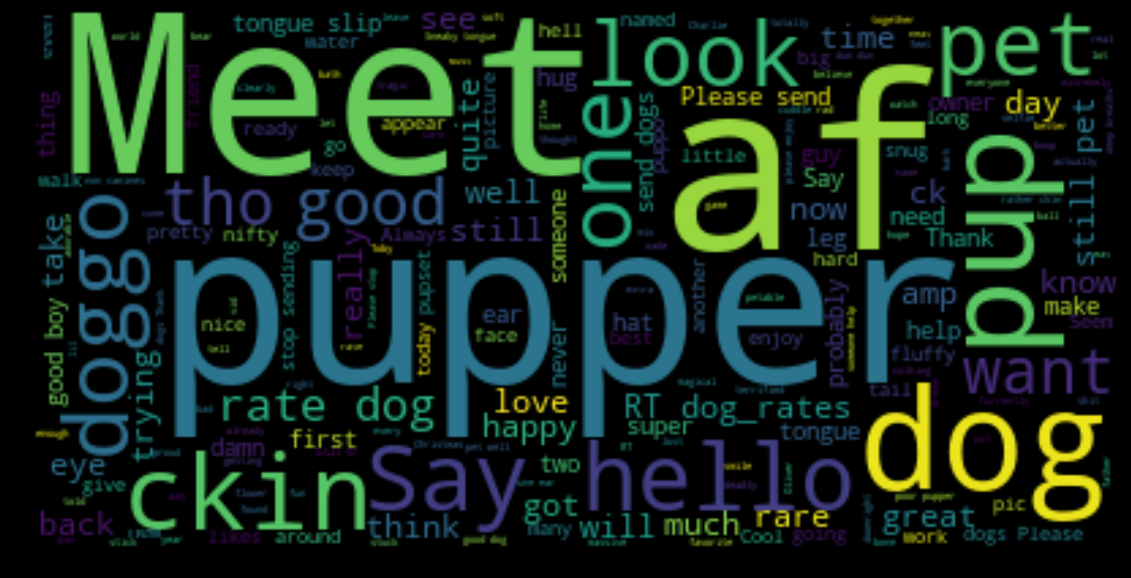

In [454]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 ## Create the wordcloud object
wordcloud = WordCloud().generate(' '.join(twitter_archive_master['text']))
# Display the generated image:
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


##### From above wordcloud it seems that pupper, Meet, af, dog, pup, say hello, ckin are most frequent words.

## Plot name column

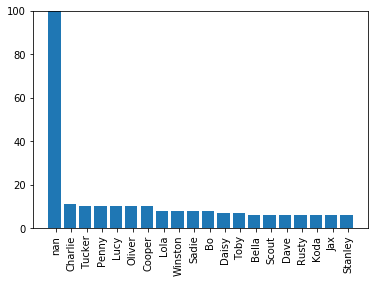

In [455]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
word_list = twitter_archive_master['name']
counts = dict(Counter(word_list).most_common(20))
labels, values = zip(*counts.items())
# sort your values in descending order
indSort = np.argsort(values)[::-1]
# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]
indexes = np.arange(len(labels))
bar_width = 0.1
plt.bar(indexes, values)
axes = plt.gca()
axes.set_ylim([0,100])
# add labels
plt.xticks(rotation=90)
plt.xticks(indexes + bar_width, labels)
plt.show()

##### Above plot shows the first 20 most frequent names appear in name column.

## Plot Dog_stage

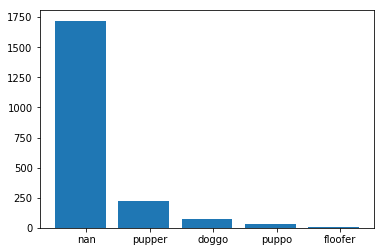

In [456]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

word_list = twitter_archive_master['dog_stage']

counts = dict(Counter(word_list).most_common(5))

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.1

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)
plt.show()

##### Above plot shows the first 5 most frequent dog_stage appear in dog_stage column.

(2.5, 20)

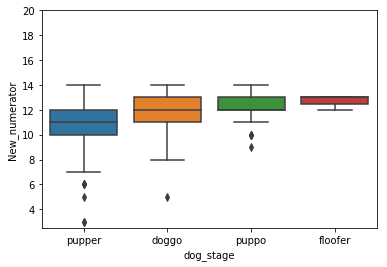

In [457]:
import seaborn as sns
%matplotlib inline
sns.boxplot(x="dog_stage", y="New_numerator", data=twitter_archive_master)
axes = plt.gca()
axes.set_ylim([2.5,20])

##### Above plot shows that mean rating_numerator value is higher for doggo dog_stage.

(0, 19000)

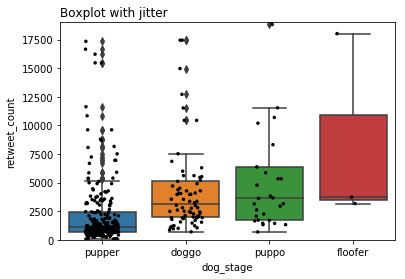

In [458]:
sns.boxplot(x="dog_stage", y="retweet_count", data=twitter_archive_master)
sns.stripplot(x="dog_stage", y="retweet_count", data=twitter_archive_master, color="black", jitter=0.2, size=3.5)
plt.title("Boxplot with jitter", loc="left")
axes = plt.gca()
axes.set_ylim([0,19000])

(0, 50000)

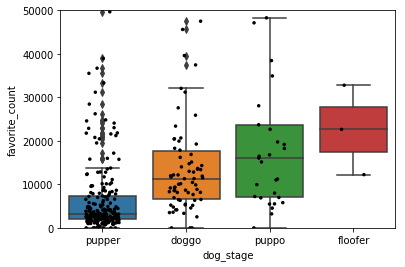

In [459]:
sns.boxplot(x="dog_stage", y="favorite_count", data=twitter_archive_master)
sns.stripplot(x="dog_stage", y="favorite_count", data=twitter_archive_master, color="black", jitter=0.2, size=3.5)
axes = plt.gca()
axes.set_ylim([0,50000])

## Extract year, month, day from timestamp column

In [460]:
twitter_archive_master_copy = twitter_archive_master.copy()

In [461]:
#import datetime
twitter_archive_master_copy['year'], twitter_archive_master_copy['month'], twitter_archive_master_copy['day'] = twitter_archive_master_copy['timestamp'].dt.year, twitter_archive_master_copy['timestamp'].dt.month, twitter_archive_master_copy['timestamp'].dt.day

(0, 55000)

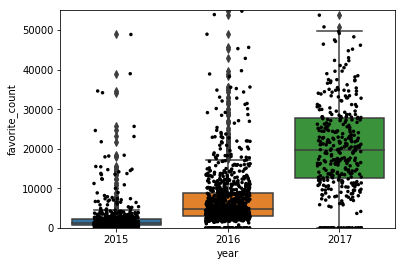

In [462]:
sns.boxplot(x="year", y="favorite_count", data=twitter_archive_master_copy)
sns.stripplot(x="year", y="favorite_count", data=twitter_archive_master_copy, color="black", jitter=0.2, size=3.5)
axes = plt.gca()
axes.set_ylim([0,55000])

(0, 60000)

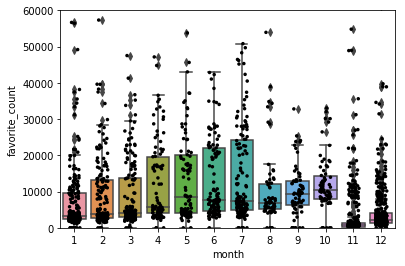

In [463]:
sns.boxplot(x="month", y="favorite_count", data=twitter_archive_master_copy)
sns.stripplot(x="month", y="favorite_count", data=twitter_archive_master_copy, color="black", jitter=0.2, size=3.5)
axes = plt.gca()
axes.set_ylim([0,60000])

(0, 50000)

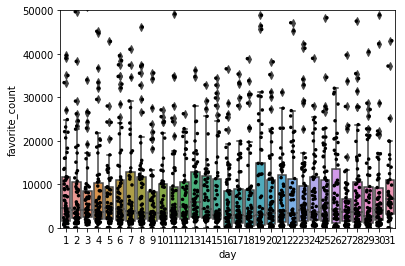

In [464]:
sns.boxplot(x="day", y="favorite_count", data=twitter_archive_master_copy)
sns.stripplot(x="day", y="favorite_count", data=twitter_archive_master_copy, color="black", jitter=0.2, size=3.5)
axes = plt.gca()
axes.set_ylim([0,50000])

(13, 20000)

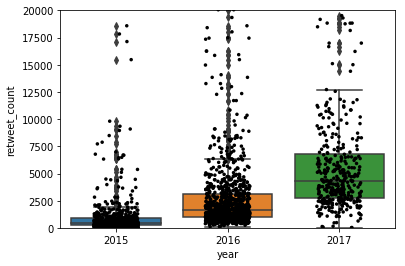

In [465]:
sns.boxplot(x="year", y="retweet_count", data=twitter_archive_master_copy)
sns.stripplot(x="year", y="retweet_count", data=twitter_archive_master_copy, color="black", jitter=0.2, size=3.5)
axes = plt.gca()
axes.set_ylim([13,20000])

(13, 20000)

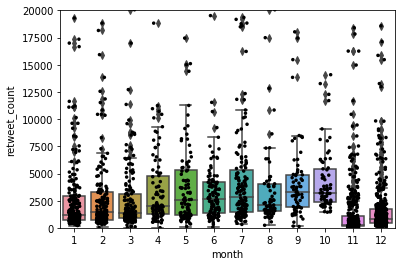

In [466]:
sns.boxplot(x="month", y="retweet_count", data=twitter_archive_master_copy)
sns.stripplot(x="month", y="retweet_count", data=twitter_archive_master_copy, color="black", jitter=0.2, size=3.5)
axes = plt.gca()
axes.set_ylim([13,20000])

(13, 20000)

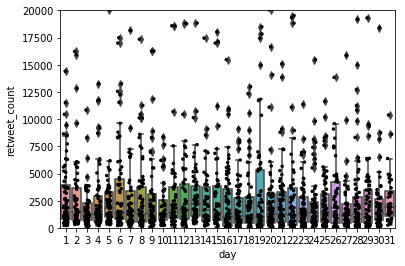

In [467]:
sns.boxplot(x="day", y="retweet_count", data=twitter_archive_master_copy)
sns.stripplot(x="day", y="retweet_count", data=twitter_archive_master_copy, color="black", jitter=0.2, size=3.5)
axes = plt.gca()
axes.set_ylim([13,20000])

(2, 18)

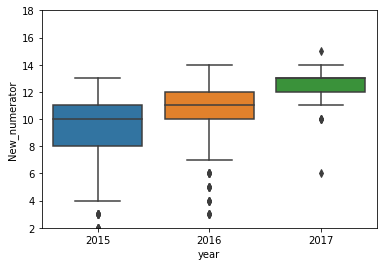

In [468]:

sns.boxplot(x="year", y="New_numerator", data=twitter_archive_master_copy)
axes = plt.gca()
axes.set_ylim([2,18])

(2, 18)

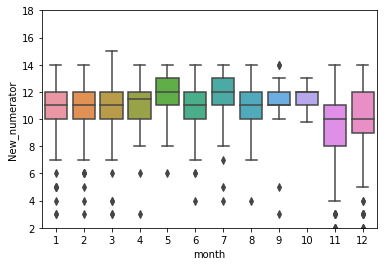

In [469]:
sns.boxplot(x="month", y="New_numerator", data=twitter_archive_master_copy)
axes = plt.gca()
axes.set_ylim([2,18])

(4, 18)

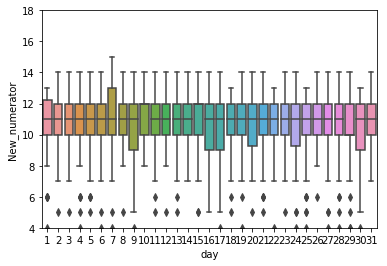

In [470]:
sns.boxplot(x="day", y="New_numerator", data=twitter_archive_master_copy)
axes = plt.gca()
axes.set_ylim([4,18])

In [471]:
Top_largest_numerator = twitter_archive_master_copy.nlargest(7, 'New_numerator')
Top_largest_numerator

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,expanded_urls,rating_denominator,name,dog_stage,New_numerator,retweet_count,favorite_count,year,month,day
1255,749981277374128128,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,...,https://twitter.com/dog_rates/status/749981277374128128/photo/1,10,Atticus,NaN,1776.0,2722,5535,2016,7,4
276,670842764863651840,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,...,https://twitter.com/dog_rates/status/670842764863651840/photo/1,10,NaN,NaN,420.0,9349,25653,2015,11,29
1824,838916489579200512,https://pbs.twimg.com/media/C6RkiQZUsAAM4R4.jpg,2,web_site,0.993651,False,monitor,0.001406,False,envelope,...,"https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1",10,NaN,NaN,15.0,37,0,2017,3,7
709,685547936038666240,https://pbs.twimg.com/media/CYOONfZW8AA7IOA.jpg,1,web_site,0.923987,False,oscilloscope,0.009712,False,hand-held_computer,...,"https://twitter.com/dog_rates/status/685547936038666240/photo/1,https://twitter.com/dog_rates/status/685547936038666240/photo/1",10,NaN,pupper,14.0,17349,35539,2016,1,8
1195,742465774154047488,https://pbs.twimg.com/media/Ck3EribXEAAPhZn.jpg,1,web_site,0.997154,False,comic_book,0.000439,False,desktop_computer,...,"https://twitter.com/dog_rates/status/742465774154047488/photo/1,https://twitter.com/dog_rates/status/742465774154047488/photo/1",10,NaN,pupper,14.0,4286,7809,2016,6,13
1302,755206590534418437,https://pbs.twimg.com/media/CnsIT0WWcAAul8V.jpg,1,web_site,0.906673,False,printer,0.008600,False,carton,...,"https://twitter.com/dog_rates/status/755206590534418437/photo/1,https://twitter.com/dog_rates/status/755206590534418437/photo/1,https://twitter.com/dog_rates/status/755206590534418437/photo/1,https://twitter.com/dog_rates/status/755206590534418437/photo/1",10,NaN,doggo,14.0,6004,17885,2016,7,19
1354,762035686371364864,https://pbs.twimg.com/ext_tw_video_thumb/762035577168560129/pu/img/kD4TeHRRiSKgOyDx.jpg,1,home_theater,0.063152,False,cash_machine,0.046692,False,theater_curtain,...,https://twitter.com/dog_rates/status/762035686371364864/video/1,10,NaN,NaN,14.0,17489,34831,2016,8,6


In [472]:
Top_largest_numerator[['New_numerator', 'jpg_url', 'expanded_urls']]

,New_numerator,jpg_url,expanded_urls
1255,1776.0,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,https://twitter.com/dog_rates/status/749981277374128128/photo/1
276,420.0,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,https://twitter.com/dog_rates/status/670842764863651840/photo/1
1824,15.0,https://pbs.twimg.com/media/C6RkiQZUsAAM4R4.jpg,"https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1"
709,14.0,https://pbs.twimg.com/media/CYOONfZW8AA7IOA.jpg,"https://twitter.com/dog_rates/status/685547936038666240/photo/1,https://twitter.com/dog_rates/status/685547936038666240/photo/1"
1195,14.0,https://pbs.twimg.com/media/Ck3EribXEAAPhZn.jpg,"https://twitter.com/dog_rates/status/742465774154047488/photo/1,https://twitter.com/dog_rates/status/742465774154047488/photo/1"
1302,14.0,https://pbs.twimg.com/media/CnsIT0WWcAAul8V.jpg,"https://twitter.com/dog_rates/status/755206590534418437/photo/1,https://twitter.com/dog_rates/status/755206590534418437/photo/1,https://twitter.com/dog_rates/status/755206590534418437/photo/1,https://twitter.com/dog_rates/status/755206590534418437/photo/1"
1354,14.0,https://pbs.twimg.com/ext_tw_video_thumb/762035577168560129/pu/img/kD4TeHRRiSKgOyDx.jpg,https://twitter.com/dog_rates/status/762035686371364864/video/1


In [473]:
Top_largest_numerator.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/685547936038666240/photo/1,https://twitter.com/dog_rates/status/685547936038666240/photo/1                                                                                                                                    1
https://twitter.com/dog_rates/status/762035686371364864/video/1                                                                                                                                                                                                    1
https://twitter.com/dog_rates/status/670842764863651840/photo/1                                                                                                                                                                                                    1
https://twitter.com/dog_rates/status/755206590534418437/photo/1,https://twitter.com/dog_rates/status/755206590534418437/photo/1,https://twitter.com/dog_rates/status/755206590534418437/photo/1,https://twitter.com/dog_r

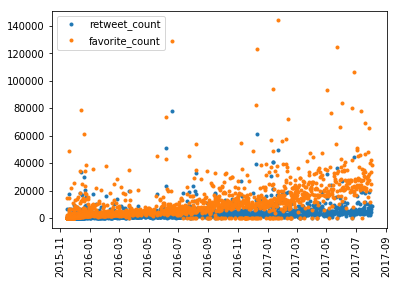

In [474]:
twitter_archive_master_copy = twitter_archive_master_copy.sort_values('timestamp', ascending=True)
plt.plot(twitter_archive_master_copy['timestamp'], twitter_archive_master_copy['retweet_count'] , '.')
plt.plot(twitter_archive_master_copy['timestamp'], twitter_archive_master_copy['favorite_count'], '.')
plt.xticks(rotation='vertical')
plt.legend(loc='upper left')

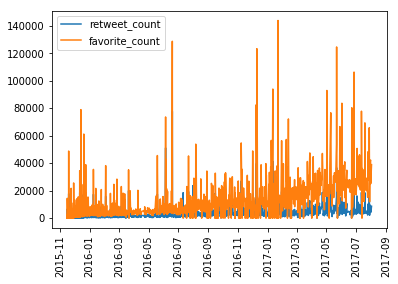

In [475]:
#plt.subplot(1, 2, 1)
#plt.subplot(1, 2, 2)
twitter_archive_master_copy = twitter_archive_master_copy.sort_values('timestamp', ascending=True)
plt.plot(twitter_archive_master_copy['timestamp'], twitter_archive_master_copy['retweet_count'])
plt.plot(twitter_archive_master_copy['timestamp'], twitter_archive_master_copy['favorite_count'])
plt.xticks(rotation='vertical')
plt.legend(loc='upper left')


In [476]:
# grouping results
twitter_archive_master_copy_gptest=twitter_archive_master_copy[['year','dog_stage','New_numerator']]
grouped_test1=twitter_archive_master_copy_gptest.groupby(['year','dog_stage'],as_index= False).mean()
grouped_test1

,year,dog_stage,New_numerator
0,2015,pupper,9.975143
1,2016,doggo,11.069767
2,2016,floofer,12.500000
3,2016,pupper,10.595420
4,2016,puppo,11.307692
5,2017,doggo,12.483871
6,2017,floofer,13.000000
7,2017,pupper,12.625000
8,2017,puppo,12.812500


In [477]:
grouped_pivot=grouped_test1.pivot(index='year',columns='dog_stage')
grouped_pivot

New_numerator                              
dog_stage         doggo floofer     pupper      puppo
year                                                 
2015      NaN           NaN      9.975143  NaN       
2016       11.069767     12.5    10.595420  11.307692
2017       12.483871     13.0    12.625000  12.812500

In [478]:
grouped_pivot=grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

New_numerator                              
dog_stage         doggo floofer     pupper      puppo
year                                                 
2015       0.000000      0.0     9.975143   0.000000 
2016       11.069767     12.5    10.595420  11.307692
2017       12.483871     13.0    12.625000  12.812500

In [479]:
import matplotlib.pyplot as plt
% matplotlib inline

#plt.pcolor(grouped_pivot, cmap='RdBu')
#plt.colorbar()
#plt.show()

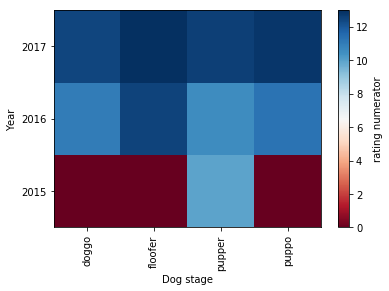

In [480]:
fig, ax=plt.subplots()
im=ax.pcolor(grouped_pivot, cmap='RdBu')
#label names
row_labels=grouped_pivot.columns.levels[1]
col_labels=grouped_pivot.index
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
plt.xticks(rotation=90)
ax.set_xlabel('Dog stage')
ax.set_ylabel('Year')
fig.colorbar(im, label='rating numerator')
plt.show()

In [481]:
# grouping results
twitter_archive_master_copy_gptest1=twitter_archive_master_copy[['year','dog_stage','favorite_count']]
grouped_test2=twitter_archive_master_copy_gptest1.groupby(['year','dog_stage'],as_index= False).mean()
grouped_test2

,year,dog_stage,favorite_count
0,2015,pupper,3301.757143
1,2016,doggo,15128.232558
2,2016,floofer,22525.000000
3,2016,pupper,5359.412214
4,2016,puppo,10152.000000
5,2017,doggo,17237.903226
6,2017,floofer,22662.000000
7,2017,pupper,25771.666667
8,2017,puppo,32465.812500


In [482]:
grouped_pivot1=grouped_test2.pivot(index='year',columns='dog_stage')
grouped_pivot1

favorite_count                                   
dog_stage          doggo  floofer        pupper       puppo
year                                                       
2015      NaN            NaN       3301.757143  NaN        
2016       15128.232558   22525.0  5359.412214   10152.0000
2017       17237.903226   22662.0  25771.666667  32465.8125

In [483]:
grouped_pivot1=grouped_pivot1.fillna(0) #fill missing values with 0
grouped_pivot1

favorite_count                                   
dog_stage          doggo  floofer        pupper       puppo
year                                                       
2015       0.000000       0.0      3301.757143   0.0000    
2016       15128.232558   22525.0  5359.412214   10152.0000
2017       17237.903226   22662.0  25771.666667  32465.8125

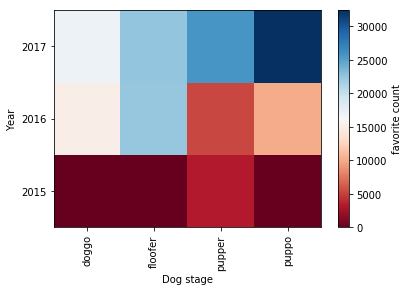

In [484]:
fig, ax=plt.subplots()
im=ax.pcolor(grouped_pivot1, cmap='RdBu')
#label names
row_labels=grouped_pivot1.columns.levels[1]
col_labels=grouped_pivot1.index
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot1.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot1.shape[0])+0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
plt.xticks(rotation=90)
ax.set_xlabel('Dog stage')
ax.set_ylabel('Year')
fig.colorbar(im, label='favorite count')
plt.show()

In [485]:
#twitter_archive_master_copy['New_numerator'].value_counts()

In [486]:
# grouping results
twitter_archive_master_copy_gptest2=twitter_archive_master_copy[['year','dog_stage','retweet_count']]
grouped_test3=twitter_archive_master_copy_gptest2.groupby(['year','dog_stage'],as_index= False).mean()
grouped_test3

,year,dog_stage,retweet_count
0,2015,pupper,1289.600000
1,2016,doggo,7097.116279
2,2016,floofer,10601.000000
3,2016,pupper,2024.183206
4,2016,puppo,3239.923077
5,2017,doggo,4671.129032
6,2017,floofer,3740.000000
7,2017,pupper,7744.208333
8,2017,puppo,9540.562500


In [487]:
grouped_pivot2=grouped_test3.pivot(index='year',columns='dog_stage')
grouped_pivot2

retweet_count                                   
dog_stage         doggo  floofer       pupper        puppo
year                                                      
2015      NaN           NaN       1289.600000 NaN         
2016       7097.116279   10601.0  2024.183206  3239.923077
2017       4671.129032   3740.0   7744.208333  9540.562500

In [488]:
grouped_pivot2=grouped_pivot2.fillna(0) #fill missing values with 0
grouped_pivot2

retweet_count                                   
dog_stage         doggo  floofer       pupper        puppo
year                                                      
2015       0.000000      0.0      1289.600000  0.000000   
2016       7097.116279   10601.0  2024.183206  3239.923077
2017       4671.129032   3740.0   7744.208333  9540.562500

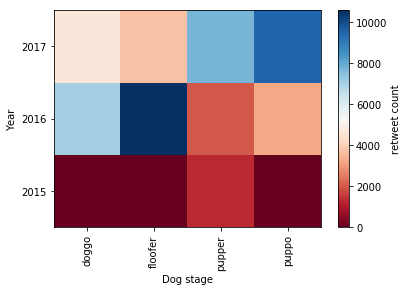

In [489]:
fig, ax=plt.subplots()
im=ax.pcolor(grouped_pivot2, cmap='RdBu')
#label names
row_labels=grouped_pivot2.columns.levels[1]
col_labels=grouped_pivot2.index
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot2.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot2.shape[0])+0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
plt.xticks(rotation=90)
ax.set_xlabel('Dog stage')
ax.set_ylabel('Year')
fig.colorbar(im, label='retweet count')
plt.show()

In [491]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Data columns (total 22 columns):
tweet_id              2051 non-null int64
jpg_url               2051 non-null object
img_num               2051 non-null int64
p1                    2051 non-null object
p1_conf               2051 non-null float64
p1_dog                2051 non-null bool
p2                    2051 non-null object
p2_conf               2051 non-null float64
p2_dog                2051 non-null bool
p3                    2051 non-null object
p3_conf               2051 non-null float64
p3_dog                2051 non-null bool
timestamp             2051 non-null datetime64[ns]
source                2051 non-null object
text                  2051 non-null object
expanded_urls         2051 non-null object
rating_denominator    2051 non-null int64
name                  1391 non-null object
dog_stage             331 non-null object
New_numerator         2051 non-null float64
retweet_count         2051 non-